In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('dataset2.csv')

In [3]:
df.shape

(188806, 15)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188806 entries, 0 to 188805
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Rndrng_Prvdr_CCN           188806 non-null  int64  
 1   Rndrng_Prvdr_Org_Name      188806 non-null  object 
 2   Rndrng_Prvdr_St            188806 non-null  object 
 3   Rndrng_Prvdr_City          188806 non-null  object 
 4   Rndrng_Prvdr_State_Abrvtn  188806 non-null  object 
 5   Rndrng_Prvdr_State_FIPS    188806 non-null  int64  
 6   Rndrng_Prvdr_Zip5          188806 non-null  int64  
 7   Rndrng_Prvdr_RUCA          188806 non-null  float64
 8   Rndrng_Prvdr_RUCA_Desc     188806 non-null  object 
 9   DRG_Cd                     188806 non-null  int64  
 10  DRG_Desc                   188806 non-null  object 
 11  Tot_Dschrgs                188806 non-null  int64  
 12  Avg_Submtd_Cvrd_Chrg       188806 non-null  float64
 13  Avg_Tot_Pymt_Amt           18

In [7]:
print(df.describe())

       Rndrng_Prvdr_CCN  Rndrng_Prvdr_State_FIPS  Rndrng_Prvdr_Zip5  \
count     188806.000000            188806.000000      188806.000000   
mean      256287.801304                28.031869       47593.929287   
std       152030.613773                15.438920       28133.362225   
min        10001.000000                 1.000000        1040.000000   
25%       110074.000000                13.000000       25701.000000   
50%       240210.000000                27.000000       44111.000000   
75%       380050.000000                41.000000       72901.000000   
max       670127.000000                56.000000       99801.000000   

       Rndrng_Prvdr_RUCA         DRG_Cd    Tot_Dschrgs  Avg_Submtd_Cvrd_Chrg  \
count      188806.000000  188806.000000  188806.000000          1.888060e+05   
mean            1.917466     417.038749      37.087614          6.893343e+04   
std             6.949857     249.006574      56.088178          8.383037e+04   
min             1.000000       1.000000 

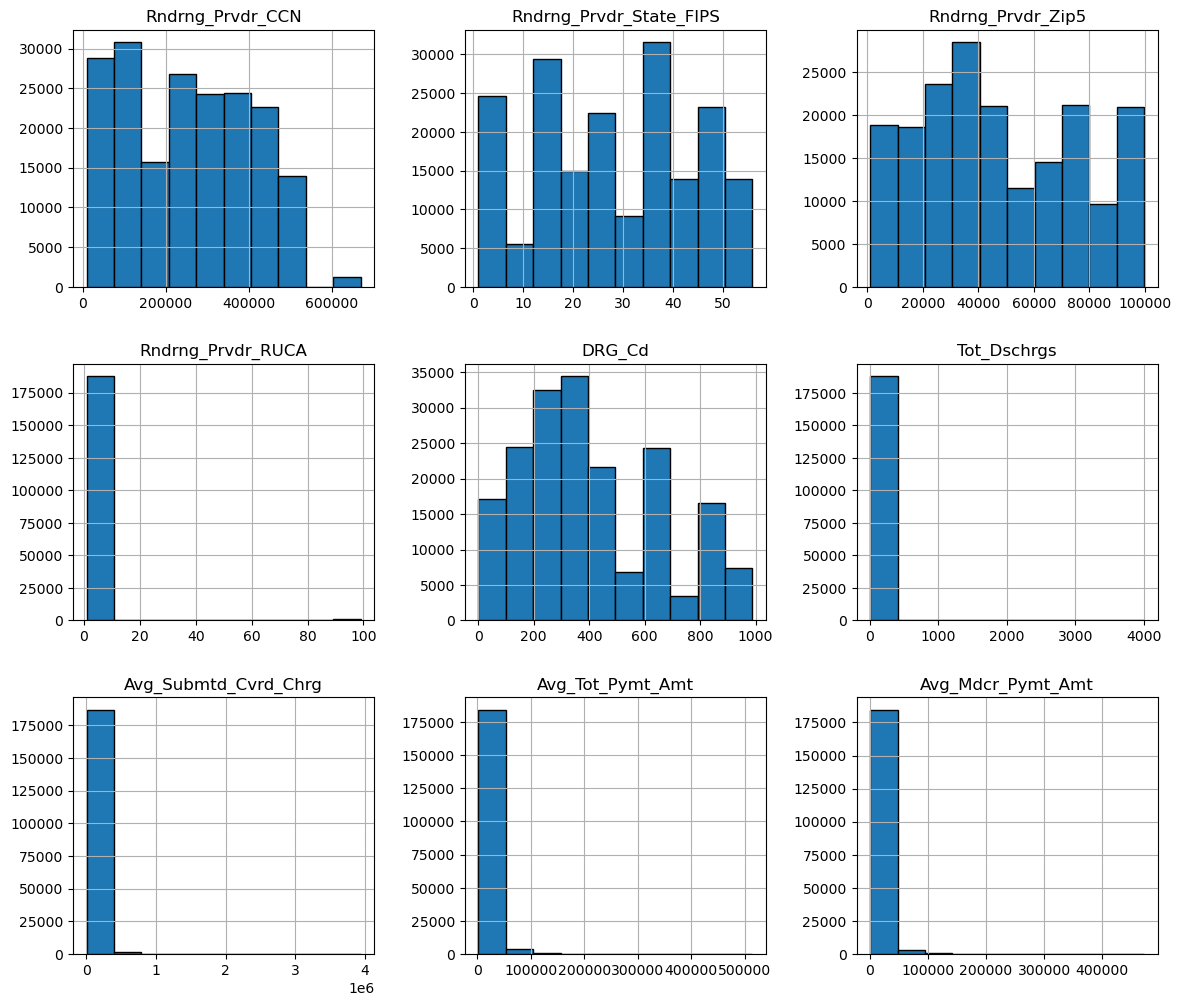

In [15]:
df.hist(edgecolor= 'black',figsize=(14,12))
plt.show()

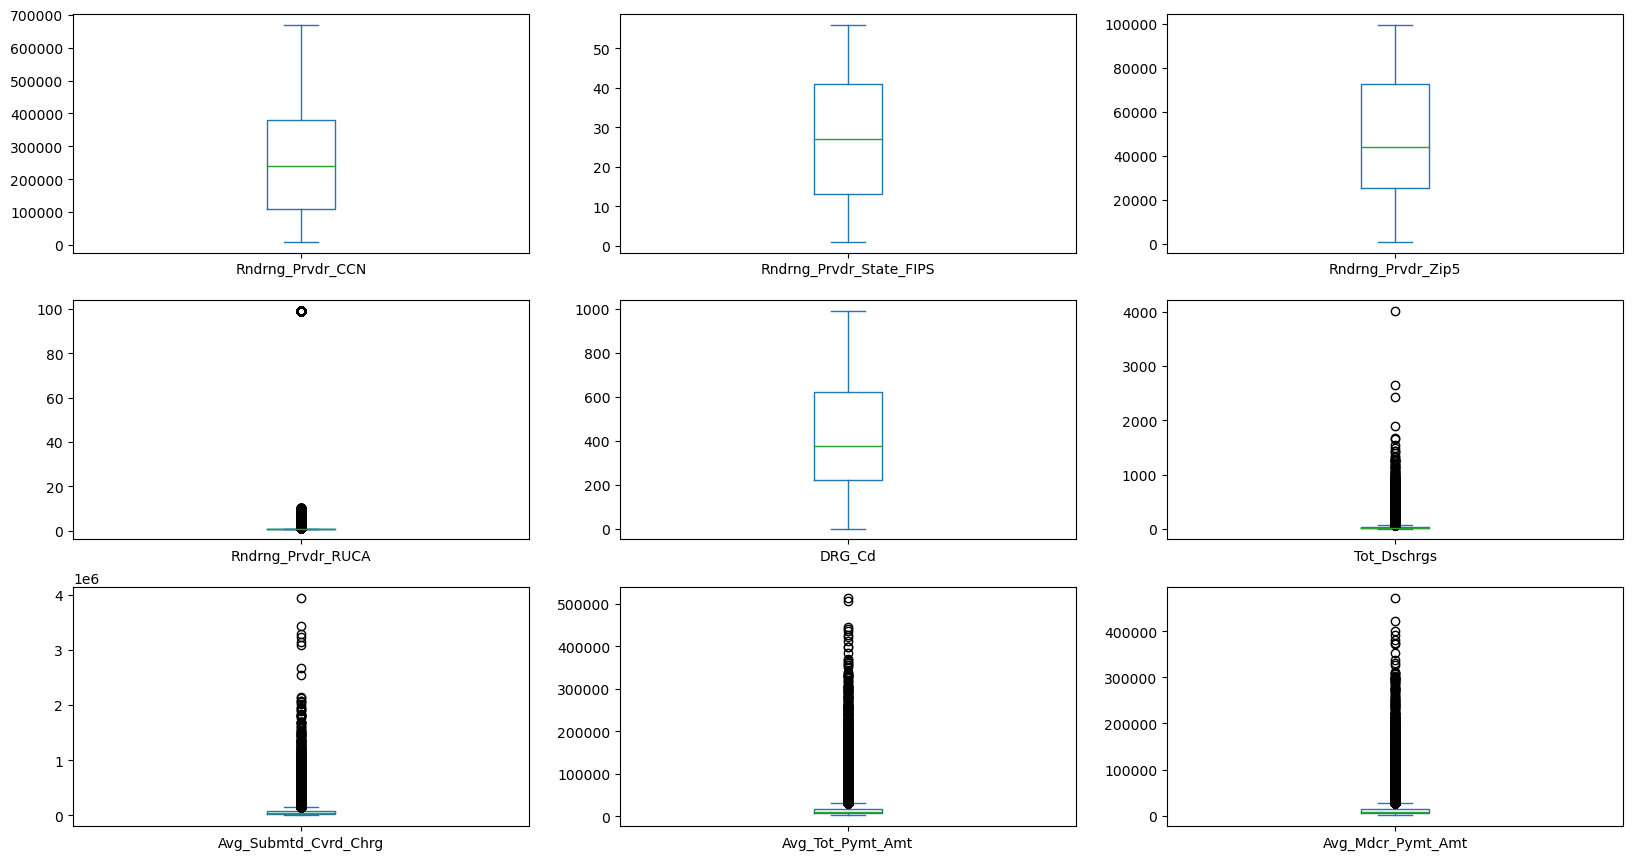

In [16]:
df.plot(kind="box", subplots=True, layout=(5,3), sharex=False, figsize=(20,18))
plt.show()

In [6]:
# Calculate descriptive statistics
avg_submitted_charges = df['Avg_Submtd_Cvrd_Chrg'].mean()
avg_total_payment = df['Avg_Tot_Pymt_Amt'].mean()

# Grouping and aggregation
state_discharges = df.groupby('Rndrng_Prvdr_State_Abrvtn')['Tot_Dschrgs'].sum()

# Correlation analysis
correlation = df[['Avg_Submtd_Cvrd_Chrg', 'Avg_Tot_Pymt_Amt', 'Tot_Dschrgs']].corr()

In [7]:
print(avg_submitted_charges)

68933.4270002488


In [8]:
print(avg_total_payment)

15276.013198257548


In [9]:
print(correlation)

                      Avg_Submtd_Cvrd_Chrg  Avg_Tot_Pymt_Amt  Tot_Dschrgs
Avg_Submtd_Cvrd_Chrg              1.000000          0.818746    -0.033836
Avg_Tot_Pymt_Amt                  0.818746          1.000000    -0.034289
Tot_Dschrgs                      -0.033836         -0.034289     1.000000


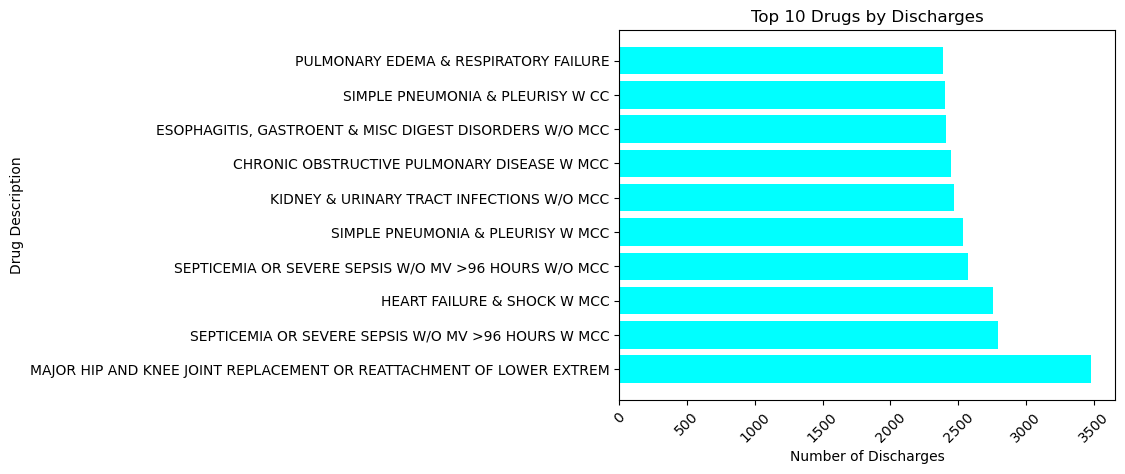

In [10]:
# Data visualization
import matplotlib.pyplot as plt
# Bar chart of drug distribution based on number of discharges
drug_counts = df['DRG_Desc'].value_counts().head(10)
plt.barh(drug_counts.index, drug_counts.values,color='cyan')
plt.ylabel('Drug Description')
plt.xlabel('Number of Discharges')
plt.title('Top 10 Drugs by Discharges')
plt.xticks(rotation=45)
plt.show()

<b>Distribution of Average Medicare Payment Amount: We can visualize the distribution of the average Medicare payment amount (Avg_Mdcr_Pymt_Amt) using a histogram to understand the range and frequency of payments.

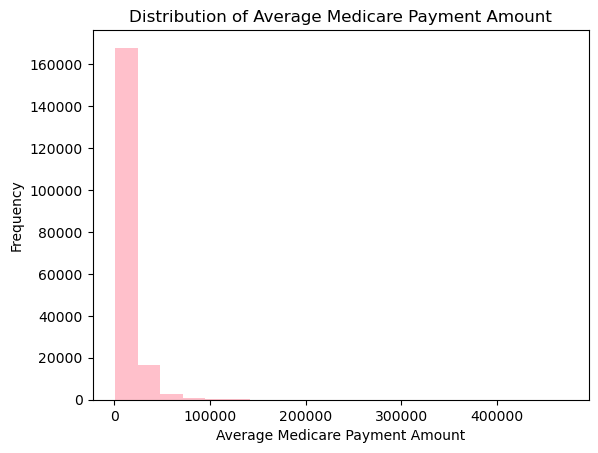

In [11]:
plt.hist(df['Avg_Mdcr_Pymt_Amt'], bins=20,color='pink')
plt.xlabel('Average Medicare Payment Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Average Medicare Payment Amount')
plt.show()


<b>Top Providers by Total Discharges: We can identify the top healthcare providers based on the total number of discharges (Tot_Dschrgs) and visualize the results using a bar chart.

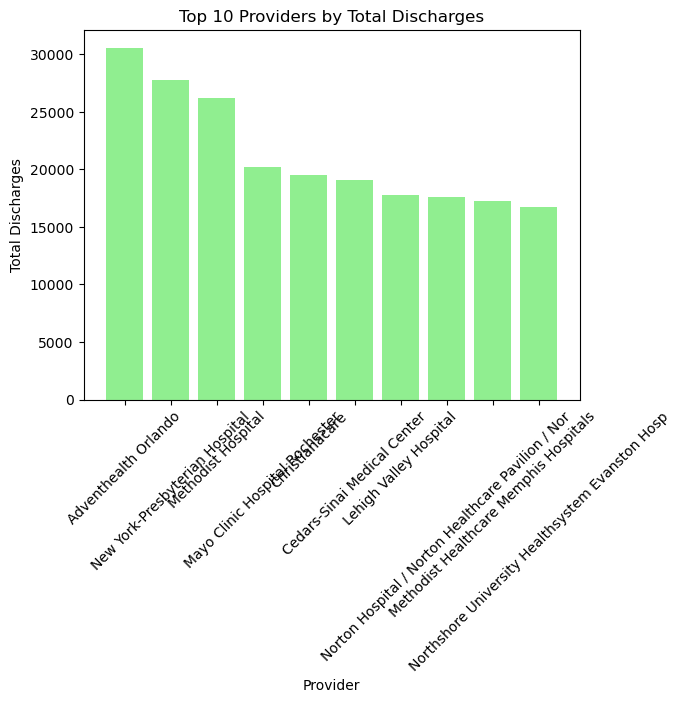

In [12]:
top_providers = df.groupby('Rndrng_Prvdr_Org_Name')['Tot_Dschrgs'].sum().nlargest(10)
plt.bar(top_providers.index, top_providers.values,color='lightgreen')
plt.xlabel('Provider')
plt.ylabel('Total Discharges')
plt.title('Top 10 Providers by Total Discharges')
plt.xticks(rotation=45)
plt.show()

<b>Average Total Payment Amount by Drug: We can calculate the average total payment amount (Avg_Tot_Pymt_Amt) for each drug (DRG_Desc) and display the results in a horizontal bar chart.

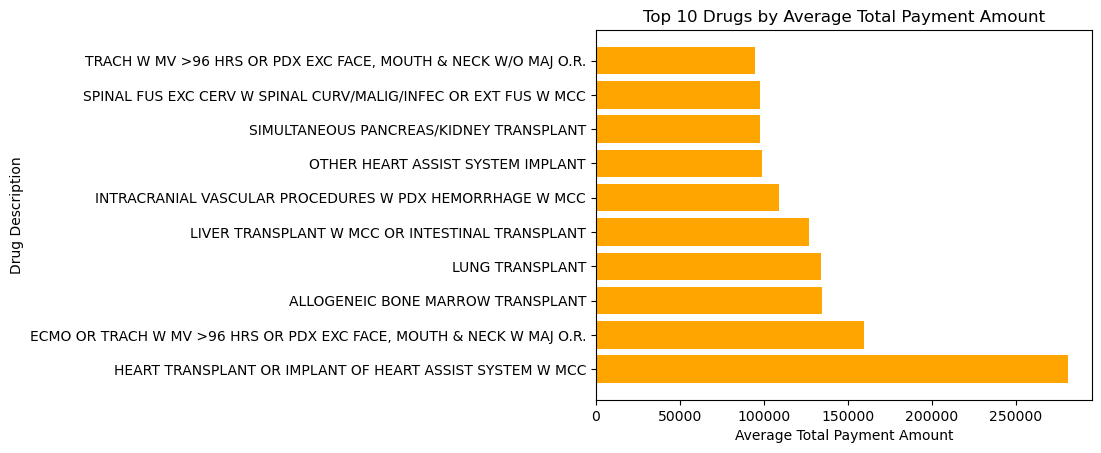

In [13]:
avg_payment_by_drug = df.groupby('DRG_Desc')['Avg_Tot_Pymt_Amt'].mean().nlargest(10)
plt.barh(avg_payment_by_drug.index, avg_payment_by_drug.values,color='orange')
plt.xlabel('Average Total Payment Amount')
plt.ylabel('Drug Description')
plt.title('Top 10 Drugs by Average Total Payment Amount')
plt.show()

<b>Relationship between Average Submitted Covered Charges and Average Total Payment Amount: We can create a scatter plot to visualize the relationship between the average submitted covered charges (Avg_Submtd_Cvrd_Chrg) and the average total payment amount (Avg_Tot_Pymt_Amt) for the drugs.

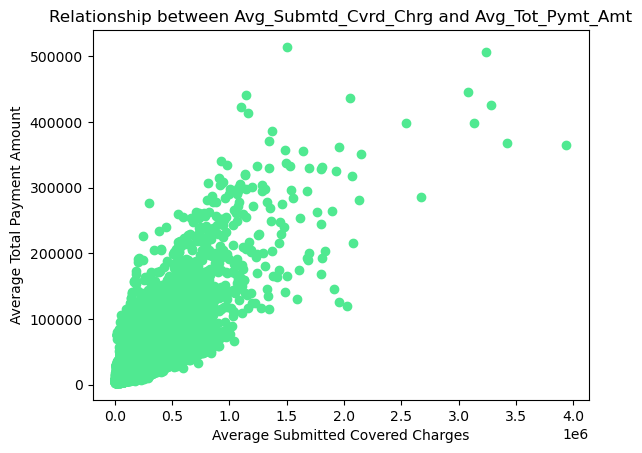

In [14]:
plt.scatter(df['Avg_Submtd_Cvrd_Chrg'], df['Avg_Tot_Pymt_Amt'],color = '#50e991')
plt.xlabel('Average Submitted Covered Charges')
plt.ylabel('Average Total Payment Amount')
plt.title('Relationship between Avg_Submtd_Cvrd_Chrg and Avg_Tot_Pymt_Amt')
plt.show()



<b>Average Total Payment Amount by State: We can create a scatter plot to represent the average total payment amount (Avg_Tot_Pymt_Amt) for different states (Rndrng_Prvdr_State_Abrvtn).

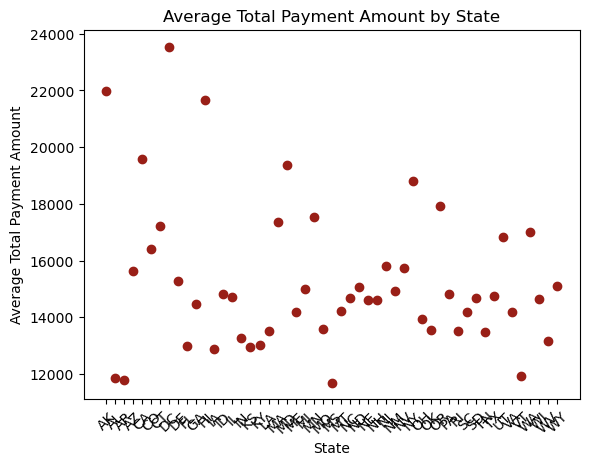

<Figure size 2000x600 with 0 Axes>

In [15]:
state_avg_payment = df.groupby('Rndrng_Prvdr_State_Abrvtn')['Avg_Tot_Pymt_Amt'].mean()
plt.scatter(state_avg_payment.index, state_avg_payment.values,color = '#991f17')
plt.xlabel('State')
plt.ylabel('Average Total Payment Amount')
plt.title('Average Total Payment Amount by State')
plt.xticks(rotation=45)
plt.figure(figsize=(20, 6))
plt.show()

<b>Relationship between Average Submitted Covered Charges and Total Discharges: We can visualize the relationship between the average submitted covered charges (Avg_Submtd_Cvrd_Chrg) and the total discharges (Tot_Dschrgs) using a scatter plot.

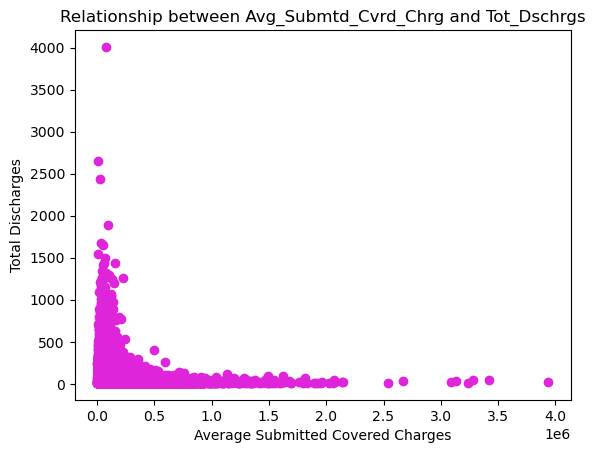

<Figure size 1000x600 with 0 Axes>

In [16]:
plt.scatter(df['Avg_Submtd_Cvrd_Chrg'], df['Tot_Dschrgs'],color='#de25da')
plt.xlabel('Average Submitted Covered Charges')
plt.ylabel('Total Discharges')
plt.title('Relationship between Avg_Submtd_Cvrd_Chrg and Tot_Dschrgs')
plt.figure(figsize=(10, 6))
plt.show()

 <b>Let's create a box plot to compare the average total payment amount (Avg_Tot_Pymt_Amt) for different drugs (DRG_Desc).

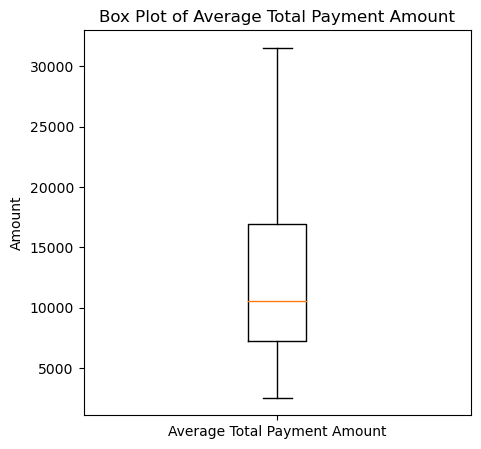

In [17]:
plt.figure(figsize=(5, 5))
plt.boxplot(df['Avg_Tot_Pymt_Amt'], showfliers=False)
plt.xticks([1], ['Average Total Payment Amount'])
plt.ylabel('Amount')
plt.title('Box Plot of Average Total Payment Amount')
plt.show()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188806 entries, 0 to 188805
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Rndrng_Prvdr_CCN           188806 non-null  int64  
 1   Rndrng_Prvdr_Org_Name      188806 non-null  object 
 2   Rndrng_Prvdr_St            188806 non-null  object 
 3   Rndrng_Prvdr_City          188806 non-null  object 
 4   Rndrng_Prvdr_State_Abrvtn  188806 non-null  object 
 5   Rndrng_Prvdr_State_FIPS    188806 non-null  int64  
 6   Rndrng_Prvdr_Zip5          188806 non-null  int64  
 7   Rndrng_Prvdr_RUCA          188806 non-null  float64
 8   Rndrng_Prvdr_RUCA_Desc     188806 non-null  object 
 9   DRG_Cd                     188806 non-null  int64  
 10  DRG_Desc                   188806 non-null  object 
 11  Tot_Dschrgs                188806 non-null  int64  
 12  Avg_Submtd_Cvrd_Chrg       188806 non-null  float64
 13  Avg_Tot_Pymt_Amt           18

<b>line plot to show the average total payment amount (Avg_Tot_Pymt_Amt) over a range of values for the Rndrng_Prvdr_CCN column.

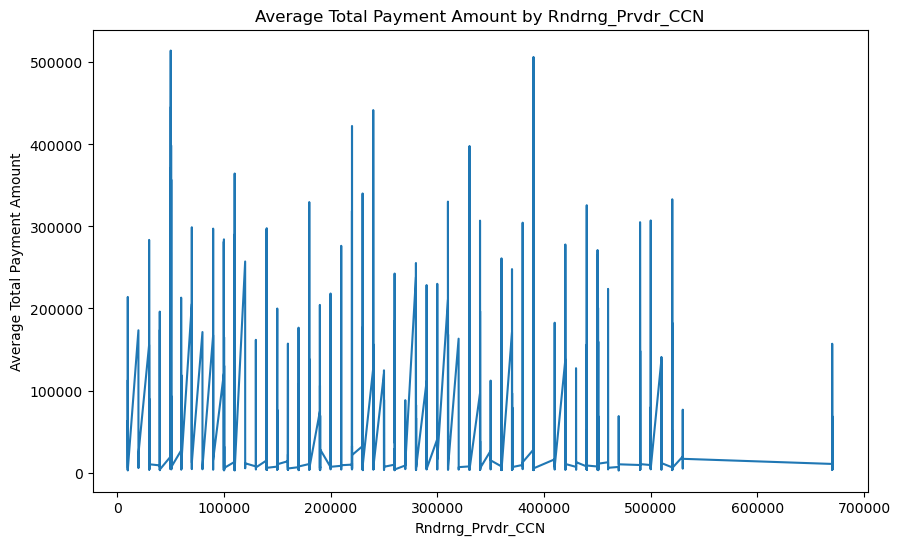

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(df['Rndrng_Prvdr_CCN'], df['Avg_Tot_Pymt_Amt'])
plt.xlabel('Rndrng_Prvdr_CCN')
plt.ylabel('Average Total Payment Amount')
plt.title('Average Total Payment Amount by Rndrng_Prvdr_CCN')
plt.show()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188806 entries, 0 to 188805
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Rndrng_Prvdr_CCN           188806 non-null  int64  
 1   Rndrng_Prvdr_Org_Name      188806 non-null  object 
 2   Rndrng_Prvdr_St            188806 non-null  object 
 3   Rndrng_Prvdr_City          188806 non-null  object 
 4   Rndrng_Prvdr_State_Abrvtn  188806 non-null  object 
 5   Rndrng_Prvdr_State_FIPS    188806 non-null  int64  
 6   Rndrng_Prvdr_Zip5          188806 non-null  int64  
 7   Rndrng_Prvdr_RUCA          188806 non-null  float64
 8   Rndrng_Prvdr_RUCA_Desc     188806 non-null  object 
 9   DRG_Cd                     188806 non-null  int64  
 10  DRG_Desc                   188806 non-null  object 
 11  Tot_Dschrgs                188806 non-null  int64  
 12  Avg_Submtd_Cvrd_Chrg       188806 non-null  float64
 13  Avg_Tot_Pymt_Amt           18

In [21]:
import seaborn as sns

C:\Users\HP\AppData\Local\Temp\ipykernel_20136\546439669.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=numerical_cols[col], shade=True,color='red')


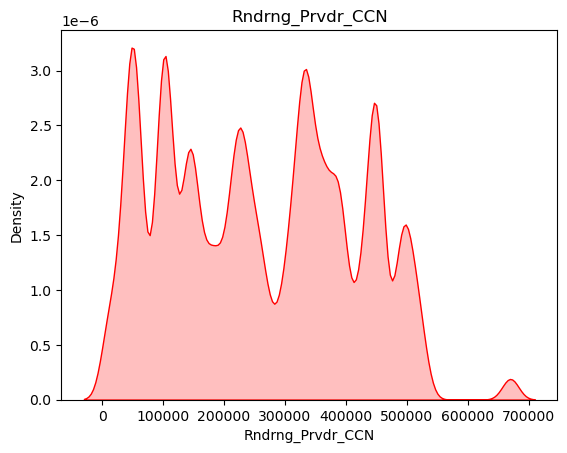

C:\Users\HP\AppData\Local\Temp\ipykernel_20136\546439669.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=numerical_cols[col], shade=True,color='red')


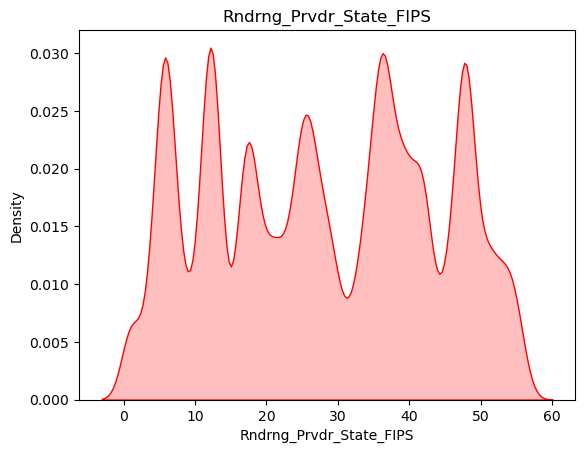

C:\Users\HP\AppData\Local\Temp\ipykernel_20136\546439669.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=numerical_cols[col], shade=True,color='red')


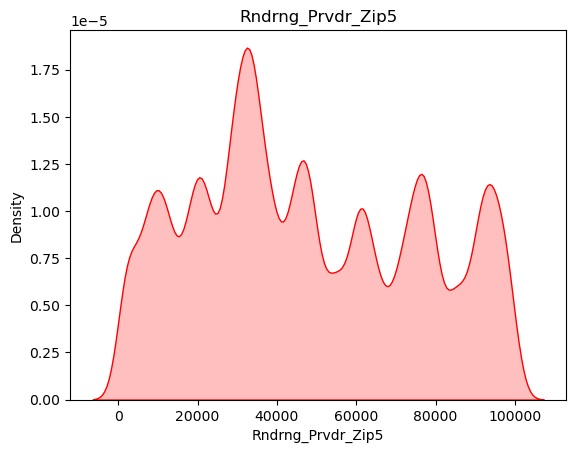

C:\Users\HP\AppData\Local\Temp\ipykernel_20136\546439669.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=numerical_cols[col], shade=True,color='red')


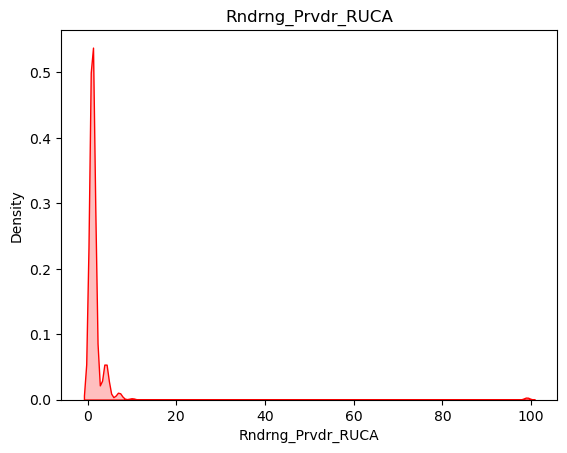

C:\Users\HP\AppData\Local\Temp\ipykernel_20136\546439669.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=numerical_cols[col], shade=True,color='red')


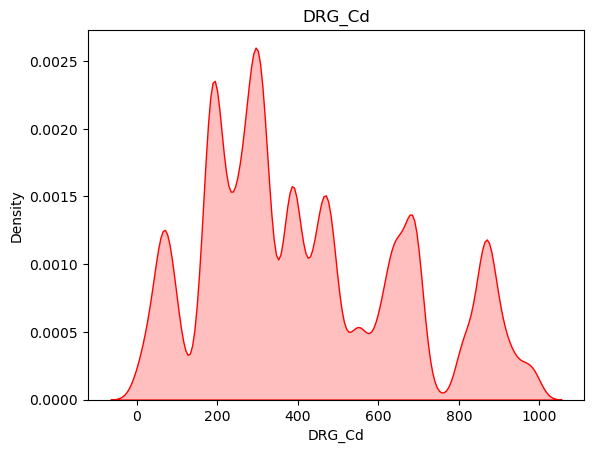

C:\Users\HP\AppData\Local\Temp\ipykernel_20136\546439669.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=numerical_cols[col], shade=True,color='red')


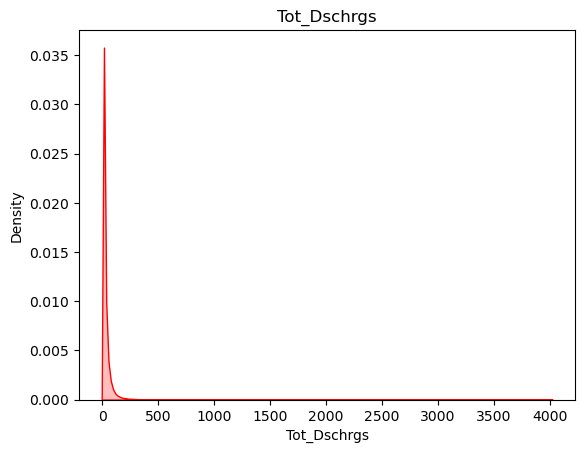

C:\Users\HP\AppData\Local\Temp\ipykernel_20136\546439669.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=numerical_cols[col], shade=True,color='red')


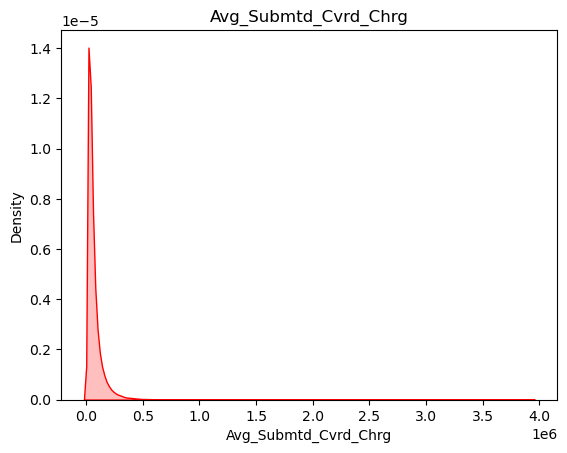

C:\Users\HP\AppData\Local\Temp\ipykernel_20136\546439669.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=numerical_cols[col], shade=True,color='red')


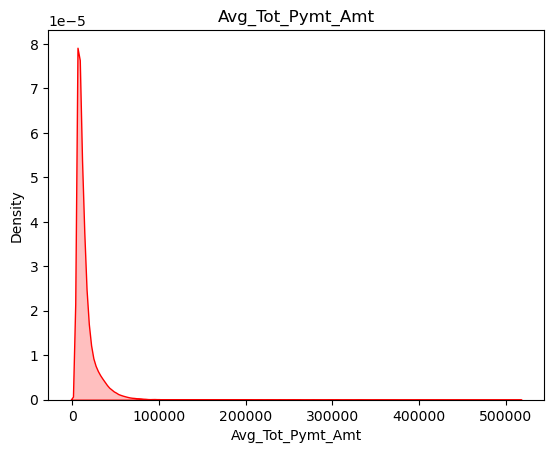

C:\Users\HP\AppData\Local\Temp\ipykernel_20136\546439669.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=numerical_cols[col], shade=True,color='red')


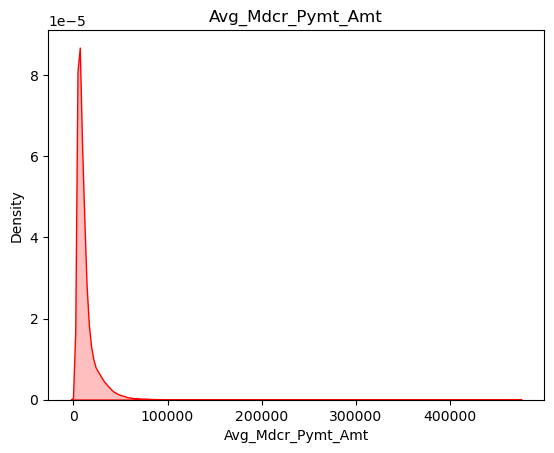

In [22]:
numerical_cols = df.select_dtypes(include=['float64', 'int64'])

# Plot KDEs for each column
for col in numerical_cols.columns:
    sns.kdeplot(data=numerical_cols[col], shade=True,color='red')
    plt.title(col)
    plt.show()

In [23]:
corr_matrix = df.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_20136\3147368345.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


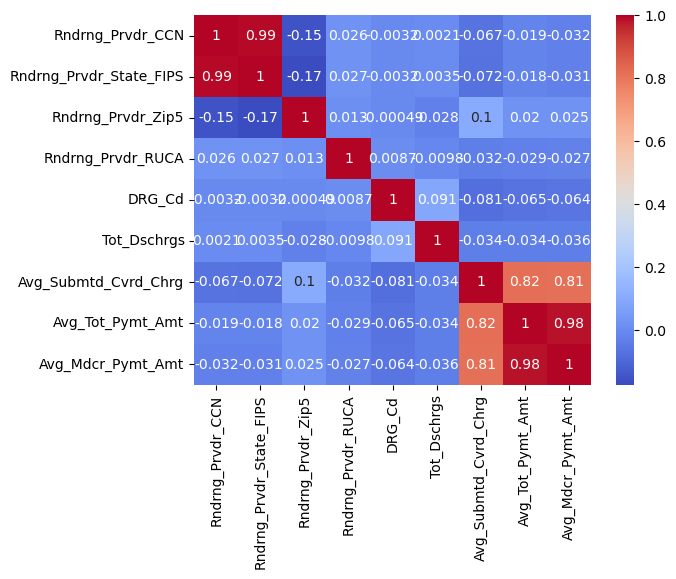

In [24]:
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


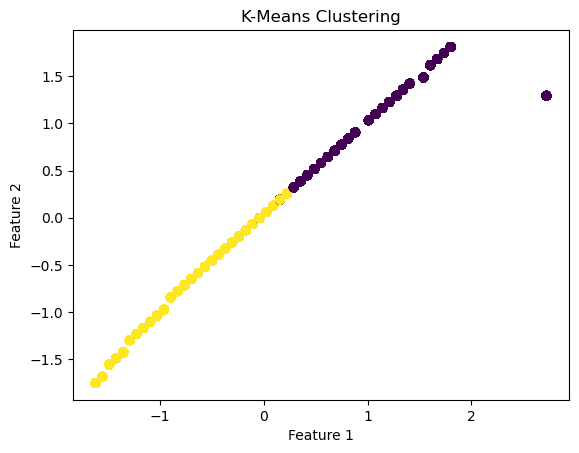

In [34]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
num_cols = df.select_dtypes(include=['float64', 'int64'])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_cols)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(scaled_data)

# Visualize the clusters
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score



In [26]:


# Select relevant numerical columns
X = df[['Rndrng_Prvdr_CCN', 'Rndrng_Prvdr_State_FIPS', 'Rndrng_Prvdr_Zip5', 'Rndrng_Prvdr_RUCA', 'DRG_Cd', 'Tot_Dschrgs', 'Avg_Submtd_Cvrd_Chrg', 'Avg_Tot_Pymt_Amt']]
y = df['Avg_Mdcr_Pymt_Amt']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [27]:
# Train a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_r2 = r2_score(y_test, lr_pred)
print('Linear Regression RMSE:', lr_rmse)
print('Linear Regression R^2:', lr_r2)



Linear Regression RMSE: 2577.587782864602
Linear Regression R^2: 0.9686909594033435


In [28]:
# Train a decision tree model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_pred))
dt_r2 = r2_score(y_test, dt_pred)
print('Decision Tree RMSE:', dt_rmse)
print('Decision Tree R^2:', dt_r2)



Decision Tree RMSE: 3347.7004097021368
Decision Tree R^2: 0.9471875881542431


In [29]:
# Train a random forest model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_r2 = r2_score(y_test, rf_pred)
print('Random Forest RMSE:', rf_rmse)
print('Random Forest R^2:', rf_r2)

Random Forest RMSE: 2437.7925405784135
Random Forest R^2: 0.9719949522118954


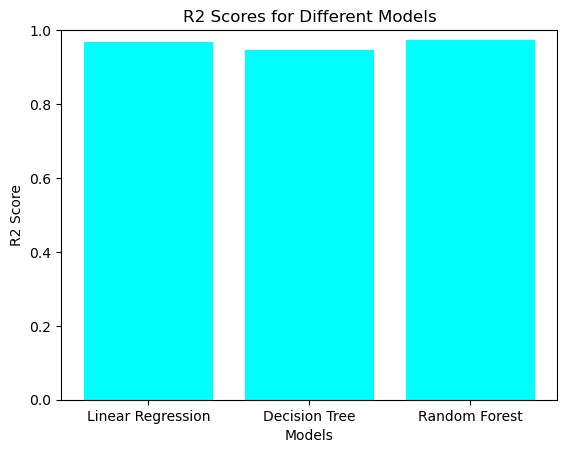

In [30]:
import matplotlib.pyplot as plt

models = ['Linear Regression', 'Decision Tree', 'Random Forest']
r2_scores = [lr_r2, dt_r2, rf_r2]

plt.bar(models, r2_scores,color = 'cyan')
plt.ylim([0,1])
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('R2 Scores for Different Models')
plt.show()
